## Google Colab Usage

*Please read (don't just hit run) the information given above each code cell as there are separate install cells for Colab*
&#128992;
*and running Python on your computer*
&#128309;.

**Confirm login account**
* Please make sure to be logged in with the Google account you want to use for the exercises before running the code cells below. You can check by clicking the circular account icon in the top right corner of the colab notebook.

**Working directory**
* Note: The software and data will be installed in a directory called "SSW2023/pRT" in your Google drive. This directory will be created if it does not exist.

**Running cells**
* Run cells individually by clicking on the triangle on each cell

**To Restart runtime**
*   Click on Runtime menu item
*   Select Restart runtime
*   Select Run code cells individually from the top

**To Recreate runtime**
*   Click on Runtime menu item
*   Select Disconnect and Delete runtime
*   Select Run code cells individually from the top

**To Exit:**
*   Close the browser window

# 0. Table of Contents

This documentation is split into two parts:
1. Todos *before* attending the hands-on session. This includes **downloading** the required input data to your Google Drive / computer and testing whether the codes petitRADTRANS (pRT) and Multinest can be successfully installed **before you attempt the exercises**.
2. Instructions that explain what to do during the hands-on session.

# 1. Preparation steps before attending the hands-on session

## 1.1 Download pRT's input data


### 1.1.1 &#128992; If running on Colab:
For running the pRT hands-on session you need 2 GB of free space for the input data on your Google Drive. Since you will download the compressed file to your drive, unzip and then delete it, 4 GB of free space are required to complete the download process. If your Drive is full and you cannot empty it sufficiently: please create a new, dedicated Gmail account for the Sagan Summer Workshop which will have 15 GB of free space. If you have enough free space and are logged into the account that you want to use, please carry out this command to connect to your Google Drive.

&#128992; **Run this cell if you are running on Colab**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


The commands below defins the download location, downloads the data, unzips it, and puts it into a default location on your Google Drive. The compressed file will then be deleted.

"SSW2023/pRT" is the default and you can leave that as-is or change it in the fill in box on the right. Be sure to pick a directory name that does not have any spaces.  This cell must be run to define the install location.

&#128992; **Run the following 2 cells if you are running on Colab**

**Please let the code cells finish before proceeding to the cells further below.**

In [ ]:
# If you update the directory in the box on the right, re-run this cell
pRT_dir = 'SSW2023/pRT' #@param {type:"string"}

In [ ]:
# Create the pRT directory in drive and install petitRADTRANS
import os

# Google top level drive dir
drive_dir = "/content/drive/MyDrive/"

# pRT directory path
pRT_path = os.path.join(drive_dir, pRT_dir)

# Create the pRT directory
try:
    os.makedirs(pRT_path, exist_ok = True)
    print("Directory '%s' created successfully" %pRT_path)
except OSError as error:
    print("Directory '%s' can not be created")

# Change to the pRT_path
os.chdir(pRT_path)

# Download petitRADTRANS
!wget -O pRT_SSW.tar.gz https://catcopy.ipac.caltech.edu/ssw/hands-on/pRT_SSW.tar.gz
!tar xf pRT_SSW.tar.gz && rm pRT_SSW.tar.gz

Directory '/content/drive/MyDrive/SSW2023/pRT' created successfully
--2023-07-26 22:02:03--  https://catcopy.ipac.caltech.edu/ssw/hands-on/pRT_SSW.tar.gz
Resolving catcopy.ipac.caltech.edu (catcopy.ipac.caltech.edu)... 134.4.25.122
Connecting to catcopy.ipac.caltech.edu (catcopy.ipac.caltech.edu)|134.4.25.122|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1438442091 (1.3G) [application/x-gzip]
Saving to: ‘pRT_SSW.tar.gz’

pRT_SSW.tar.gz      100%[===================>]   1.34G  19.5MB/s    in 83s     

2023-07-26 22:03:28 (16.5 MB/s) - ‘pRT_SSW.tar.gz’ saved [1438442091/1438442091]



### 1.1.1 &#128309; If running on your computer:

*Install petitRADTRANS (**pRT**) following the instructions in the SSW2023_Python_Instructions document available [here](https://nexsci.caltech.edu/workshop/2023/handson.shtml).*

**Even if you have a working pRT installation on your machine already, please download the data folder we prepared for the hands on session here.** This is because the folder contains additional data that we will need during the hands-on session (JWST observations, already binned-down opacities). In its unzipped form the folder has a size of 2 GB. You don't need to replace the standard pRT input data folder, just put the new folder somewhere else, but remember its absolute path.

In the code cell below, please specify path where you want to put the hands-on session input data.

&#128309; **Run this cell if running on your computer (not Colab!)**

In [ ]:
import os
absolute_path_to_the_data_folder_on_your_machine = '' # Please complete!
os.chdir(absolute_path_to_the_data_folder_on_your_machine)

The code cell below downloads the data and unzips it. This requires wget and tar to be installed, the following should then work for Mac and Linux users. It uses a .tar.gz file.

If you plan to run on Windows, you can download a zipped version of the input data by appending ".zip" instead of "tar.gz" to the url and file below and you may need to append "--no-certificate-check" to the wget commands. Or you can download a zip file directly [here](https://vmcatcopy.ipac.caltech.edu/ssw/hands-on/pRT_SSW.zip)

&#128309; **Run this cell if running on your computer (not Colab!)**

In [ ]:
!wget -O pRT_SSW.tar.gz https://catcopy.ipac.caltech.edu/ssw/hands-on/pRT_SSW.tar.gz
!tar xf pRT_SSW.tar.gz && rm pRT_SSW.tar.gz

## 1.2 Installation tests
This notebook will explain the steps necessary for testing whether petitRADTRANS  (pRT) and the retrieval sampler Multinest run in your setup.

### 1.2.1 &#128992; If running on Colab:
Note that installing pRT and Multinest is required for all Colab runtime sessions you start. But the necessary commands will always be provided for you in the first cells of any pRT hands-on session notebook. Here we are just testing whether it works in principle.

#### Multinest installation
For retrievals we will use the PyMultiNest package, which is a Python wrapper of the nested sampling code called MultiNest. For this it is first necessary to install Multinest. By running the code cell below, the notebook will clone the Multinest source code from the github repository, compile it, and copy the resulting library files to a location where PyMultiNest can find them.

&#128992; **Run this cell if you are running on Colab**

In [ ]:
import os
os.chdir('/content/')
!rm -rf multinest
!git clone https://www.github.com/johannesbuchner/multinest.git
!cd multinest/build && cmake ..
!sed -i 's/-lmkl_gf_lp64 -lmkl_gnu_thread/-lmkl_mc3 -lmkl_rt -lmkl_avx2/' multinest/build/src/CMakeFiles/multinest_shared.dir/link.txt
!cd multinest/build && make && make install
!cp /content/multinest/lib/* /lib/

Cloning into 'multinest'...
remote: Enumerating objects: 549, done.
remote: Counting objects: 100% (118/118), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 549 (delta 65), reused 49 (delta 19), pack-reused 431
Receiving objects: 100% (549/549), 300.02 KiB | 10.00 MiB/s, done.
Resolving deltas: 100% (342/342), done.
-- The Fortran compiler identification is GNU 11.3.0
-- The C compiler identification is GNU 11.3.0
-- The CXX compiler identification is GNU 11.3.0
-- Detecting Fortran compiler ABI info
-- Detecting Fortran compiler ABI info - done
-- Check for working Fortran compiler: /usr/bin/f95 - skipped
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile featu

#### Installing petitRADTRANS from PyPI.
Next, we will install petitRADTRANS from PyPI, this can simply be done via pip install, so please run the code cell below. This will also install PyMultiNest, since it is a requirement of pRT.

&#128992; **Run this cell if you are running on Colab**

In [ ]:
import numpy as np
!pip install --no-cache-dir -U petitRADTRANS

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.0/193.0 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.3/174.3 kB 173.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.4/74.4 kB 144.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 113.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 105.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 256.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 182.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 213.0 MB/s eta 0:00:00
  Created wheel for petitRADTRANS: filename=petitRADTRANS-2.6.7-cp310-cp310-linux_x86_64.whl size=966415 sha256=ee2f234d492641e9b4c9172018f59830c3bdaafb74f6984cc57267261a2f63e2
  Stored in directory: /tmp/pip-ephem-wheel-cache-v2izpawp/wheels/01/7a/12/d58563fe6b033aed09769796dc68eedcf6b052fc2c85df35c5
Successfu

### 1.2.1 &#128309; If running on your computer:
If you do not yet have a working pRT installation, please follow the installation instructions given on the [pRT website](https://petitradtrans.readthedocs.io/en/latest/content/installation.html). Please note that while installing pRT *can* go very smoothly, depending on your operating system and on whether you have an Apple chip (M1 or M2) in your Mac, things can become more complicated. While pRT has been developed using a Mac (Intel chip) and Linux, users have contributed various instructions for installing pRT on other operating systems (Mac with Apple Chips, Windows). You will find detailed descriptions of the installation process on the [pRT website](https://petitradtrans.readthedocs.io/en/latest/content/installation.html). With around 1000 registered participants, we ask for your understanding that we cannot help you installing pRT if you run into problems during the workshop. So, please, if installing pRT on your machine does not work at the moment, use the notebooks on Google Colab instead.


## 1.3 Testing the pRT installation.

First we need to tell pRT where the input data is, we do this by letting the `pRT_input_data_path` environment variable point to that folder.

### 1.3.1 &#128992; If running on Colab:

&#128992; **Run this cell if you are running on Colab**

In [ ]:
import os
os.environ['pRT_input_data_path'] = \
                  pRT_path+'/pRT_retrieval_SSW/input_data'

### 1.3.1 &#128309; If running on your computer:
Since we are using a dedicated input data folder for the hands-on session, please modify the `RT_input_data_path` for this notebook session, by pointing to the absolute path you specified above.

&#128309; **Run this cell if running on your computer (not Colab!)**

In [ ]:
import os
os.environ['pRT_input_data_path'] = \
    os.path.join(absolute_path_to_the_data_folder_on_your_machine, \
                 'pRT_retrieval_SSW/input_data')

### 1.3.2 Calculating a spectrum with pRT

Now we will run a short snippet to generate a pRT transmission spectrum. The meaning of the individual steps will be explained in more detail later. If all goes well, it should plot a planetary transmission spectrum (note it will take a few seconds to import the pRT package).

/usr/local/lib/python3.10/dist-packages/petitRADTRANS/radtrans.py:119: FutureWarning: pRT_input_data_path was set by an environment variable. In a future update, the path to the petitRADTRANS input_data will be set within a .ini file that will be automatically generated into the user home directory (OS agnostic), inside a .petitradtrans directory
  warnings.warn(f"pRT_input_data_path was set by an environment variable. In a future update, the path to "


  Read line opacities of H2O_Exomol_R_200...
 Done.
  Read line opacities of CO_all_iso_HITEMP_R_200...
 Done.
  Read line opacities of CH4_hargreaves_R_200...
 Done.
  Read line opacities of CO2_R_200...
 Done.
  Read line opacities of SO2_R_200...
 Done.

  Read CIA opacities for H2-H2...
  Read CIA opacities for H2-He...
Done.



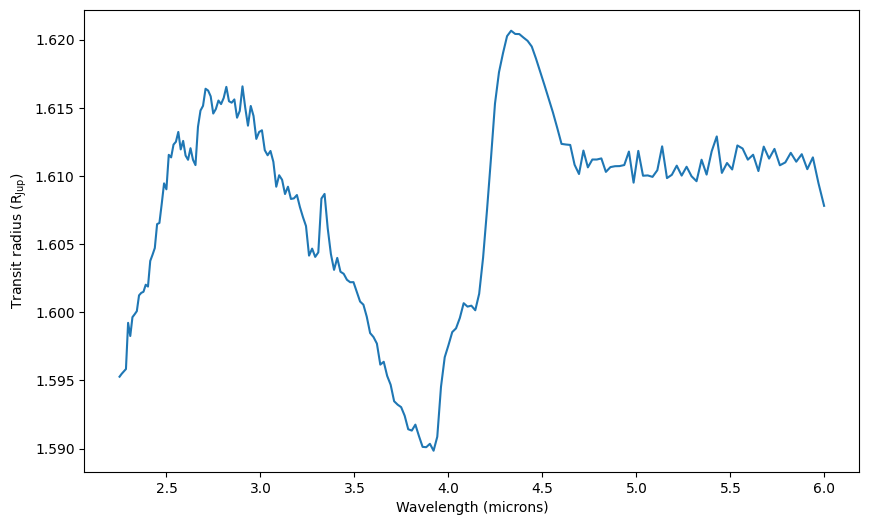

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from petitRADTRANS import Radtrans
from petitRADTRANS import nat_cst as nc

atmosphere = Radtrans(line_species = ['H2O_Exomol_R_200',
                                      'CO_all_iso_HITEMP_R_200',
                                      'CH4_hargreaves_R_200',
                                      'CO2_R_200',
                                      'SO2_R_200'],
                      rayleigh_species = ['H2', 'He'],
                      continuum_opacities = ['H2-H2', 'H2-He'],
                      wlen_bords_micron = [2.25, 6])

pressures = np.logspace(-6, 2, 100)
atmosphere.setup_opa_structure(pressures)

temperature = 1200. * np.ones_like(pressures)

mass_fractions = {}
mass_fractions['H2'] = 0.74 * np.ones_like(temperature)
mass_fractions['He'] = 0.24 * np.ones_like(temperature)
mass_fractions['H2O'] = 0.001 * np.ones_like(temperature)
mass_fractions['CO'] = 0.005 * np.ones_like(temperature)
mass_fractions['CO2'] = 0.00001 * np.ones_like(temperature)
mass_fractions['SO2'] = 0.00001 * np.ones_like(temperature)
mass_fractions['CH4'] = 0.000001 * np.ones_like(temperature)

MMW = 2.33 * np.ones_like(temperature)

R_pl = 1.6*nc.r_jup_mean
gravity = 1e1**3.
P0 = 0.01

atmosphere.calc_transm(temperature, mass_fractions, gravity, MMW, R_pl=R_pl, P0_bar=P0)

plt.rcParams['figure.figsize'] = (10, 6)

plt.plot(nc.c/atmosphere.freq/1e-4, atmosphere.transm_rad/nc.r_jup_mean)

plt.xlabel('Wavelength (microns)')
plt.ylabel(r'Transit radius ($\rm R_{Jup}$)')
plt.show()

## 1.4 Testing the MultiNest installation
The snippet below tests whether PyMultiNest works as intended. Simply run it and check that you don't get any errors (note that you may get a "divide by zero encountered" warning). This test is taken from Johannes Buchner's [PyMultiNest tutorial](http://johannesbuchner.github.io/pymultinest-tutorial/).

<ipython-input-8-cf282a6525e5>:23: RuntimeWarning: divide by zero encountered in log
  return log(likelihood.mean())


model "out/"
  analysing data from out/.txt
  marginal likelihood:
    ln Z = -0.7 +- 0.0
  parameters:
    position       0.53 +- 0.45
creating marginal plot ...


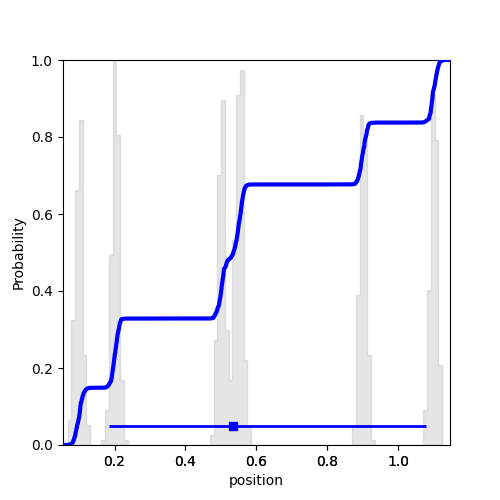

In [ ]:
import json
from numpy import log, exp, pi
import scipy.stats, scipy
import pymultinest
import matplotlib.pyplot as plt

# Note for Colab users - creates the directory in the runtime, not persistent in Drive
! mkdir PMN_test_run
! mkdir PMN_test_run/out

os.chdir('PMN_test_run')

def prior(cube, ndim, nparams):
	cube[0] = cube[0] * 2

positions = np.array([0.1, 0.2, 0.5, 0.55, 0.9, 1.1])
width = 0.01

def loglike(cube, ndim, nparams):
	# get the current parameter (is between 0:2 now)
	pos = cube[0]
	likelihood = exp(-0.5 * ((pos - positions) / width)**2) / (2*pi*width**2)**0.5
	return log(likelihood.mean())

parameters = ["position"]
n_params = len(parameters)

pymultinest.run(loglike, prior, n_params, outputfiles_basename='out/',
	resume = False, verbose = True)
json.dump(parameters, open('out/params.json', 'w'))

!multinest_marginals.py out/

from IPython.display import Image
Image('out/marg.png')

In [ ]:
# go back up a directory
os.chdir('../')

# 2. During the Hands-on session IV exercises: how to start
The retrieval hands-on session has two parts. Both parts consist of a notebook. In the first you will learn how to use pRT. The second notebook focuses on how to run retrievals. The idea is that you read through the notebooks, run the provided code cells and complete the exercises which consist of filling in blank code lines. At the end of the hands on session you will have run your own retrieval on actual JWST observations! Please click the links provided below to start with the hands-on session notebooks and save a copy in  your own Google Drive. Please stick to the order, since the second nodebook builds on the knowledge you gain in the first!
1. [Exercise notebook: an introduction to pRT](https://colab.research.google.com/drive/1CzyrIXuYqqbsD1tQCVyGBuPxbQZRzkZK?usp=sharing)
2. [Exercise notebook: running retrievals on JWST data](https://colab.research.google.com/drive/1YL30vMtqEf3iLZItLPib3QTtZ4xyFT7X?usp=sharing)